#### Introduction to Causal Inferrence

Association is not causation, we know that. And yet sometimes, association is causation. Causal inference is the science of inferring causation from association and understanding when and why they differ. A common use of causal inference is understanding the impact of interventions. 

The fundamental problem of causal inference is that you can never observe the same individual unit with and without treatment. The individual treatment effect, (which we can't really observe) is defined based on potential outcomes. 

$\tau_i = Y_{1i} -  Y_{0i}$ 

The observed outcome ($Y_i$) equals the potential treatment outcome ($Y_{1i}$) if the unit received the treatment ($T_i=1$); otherwise it equals the potential control outcome ($Y_{0i}$) if the unit did not receive the treatment ($T_i=0$). 

The do(·) operator simply gives rise to the conterfactual or potential outcomes, $Y_{ti}$.

$Y_{ti} = Y_i|do(T_i=t)$

This can be read as the outcome of unit $i$ would be $Y$ if its treatment were set to $t$.

The observed outcome can be expressed in termes of the potential outcomes. 

$Y_i = T_iY_{1i} + (1-T_i)Y_{0i}=Y_{0i}+ T_i(Y_{1i}-Y_{0i})$

For a business problem investigating the effect of marketing sales on amount sold on a group of businesses: 

$\tau_i = AmountSold_{i}|do(isOnSales=1) - AmountSold_{i}|do(isOnSales=0)$ 

$\tau_i = AmountSold_{1i} - AmountSold_{0i}

Even though we cant observe the individual treatment effect, we can learn other causal quantities from data. One is the average treatment effect (ATE):

$ATE  = E[\tau_i]$ or

$ATE = E[Y_{1i}-Y_{0i}]$  where Y is the outcome variable such as AmountSold 

$ATE = E[AmountSold_{1i} - AmountSold_{0i}]]$ 

To estimate the ATE from data, replace the expectation with sample averages.

$\frac{1}{N}\Sigma_{i=0}^N\tau_i$ or 

$\frac{1}{N}\Sigma_{i=0}^N(Y_{1i}-Y_{0i})$

The average treatment effect on the treated (ATT) is the impact of the treatment on the units that go the treatment. Note that technically, since you are conditioning on the treated, $Y_{0i}$ is always unobserved.

$ATT=E[Y_{1i}-Y_{0i}|T=1]$

$ATT=E[AmountSold_{1i}-AmountSold_{0i}|IsOnSales=1]$

The conditional average treatement effects (CATE)  is the effect in a group defined by the variables X. Conditional average treatment effect allows to know which type of unit, i, responds better to an intervention.

$CATE=E[Y_{1i}-Y_{0i}|X=x]$

$CATE=E[AmountSold_{1i}-AmountSold_{0i}|weeksToXmas=0]$


In [134]:
import pandas as pd 
import numpy as np 
from scipy.special import expit 
import seaborn as sns 
from matplotlib import pyplot as plt 
from cycler import cycler               # object for cycling over plotting style kwargs

In [135]:
# create cycling objects
default_cycler = (cycler(color=['0.3', '0.5', '0.7', '0.5']) + 
                  cycler(linestyle=['-', '--', ':', '-.']) + 
                  cycler(marker=['o', 'v', 'd', 'p']))

color=['0.3', '0.5', '0.7', '0.5']
linestyle=['-', '--', ':', '-.']
marker=['o', 'v', 'd', 'p']

plt.rc('axes', prop_cycle=default_cycler)
plt.rc('font', size=20)

In [136]:
data = pd.read_csv("./data/xmas_sales.csv")
data.head()

,store,weeks_to_xmas,avg_week_sales,is_on_sale,weekly_amount_sold
0,1,3,12.98,1,219.60
1,1,2,12.98,1,184.70
2,1,1,12.98,1,145.75
3,1,0,12.98,0,102.45
4,2,3,19.92,0,103.22


In [137]:
data.shape

(2000, 5)

In [138]:
data2.dtypes

store                 category
weeks_to_xmas         category
avg_week_sales         float64
is_on_sale            category
weekly_amount_sold     float64
dtype: object

In [139]:
data2 = data.copy()
data2.store = data2.store.astype('category')
data2.weeks_to_xmas = data2.weeks_to_xmas.astype('category')
data2.is_on_sale = data2.is_on_sale.astype('category')
data2.dtypes

store                 category
weeks_to_xmas         category
avg_week_sales         float64
is_on_sale            category
weekly_amount_sold     float64
dtype: object

In [140]:
data2.describe()

,avg_week_sales,weekly_amount_sold
count,2000.000000,2000.000000
mean,20.214360,102.992225
std,4.632169,75.278527
min,9.700000,0.000000
25%,17.140000,41.127500
50%,19.815000,97.825000
75%,22.910000,155.130000
max,42.960000,423.010000


In [141]:
data2.describe(include='category')

,store,weeks_to_xmas,is_on_sale
count,2000,2000,2000
unique,500,4,2
top,1,0,1
freq,4,500,1024


In [142]:
# check if sale vs no-sale data is balanced
sale_mask = data2['is_on_sale'] == 1
sale_mask.mean()

0.512

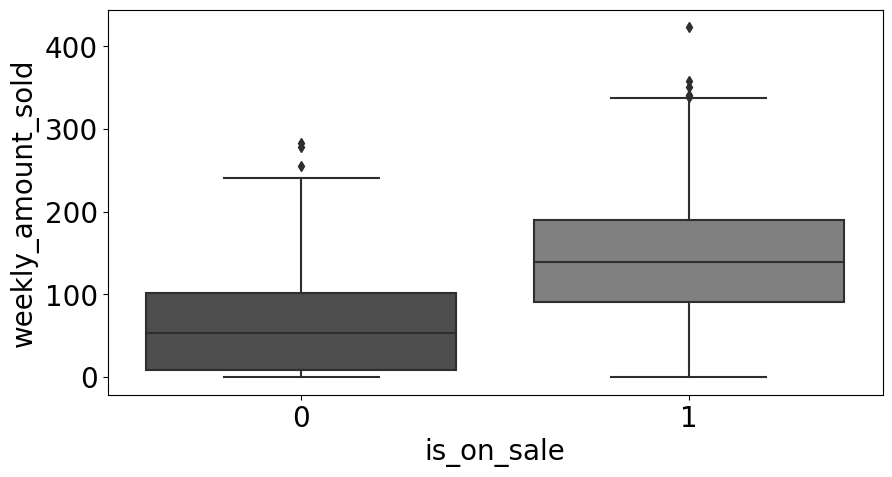

In [143]:
# Plot the outcome by the treatment
fig, ax = plt.subplots(1,1, figsize=(10,5))
sns.boxplot(y='weekly_amount_sold', x='is_on_sale', data=data, ax=ax) # boxplot of target vs treatment
ax.set_xlabel('is_on_sale')
ax.set_ylabel('weekly_amount_sold')
ax.tick_params(axis='both', which='major')

In [144]:
data.groupby(by=['is_on_sale', 'store']).agg({'weekly_amount_sold': 'mean'})

weekly_amount_sold
is_on_sale store                    
0          1              102.450000
           2               42.697500
           3               44.085000
           4               26.850000
           5              106.702500
...                              ...
1          496            130.200000
           497            135.016667
           498             68.010000
           499             15.600000
           500            111.160000

[906 rows x 1 columns]

In [145]:
a = data.pivot_table(values='weekly_amount_sold', aggfunc='mean', index='store', columns='is_on_sale')
a.head()

is_on_sale,0,1
store,,
1,102.4500,183.350
2,42.6975,NaN
3,44.0850,NaN
4,26.8500,87.665
5,106.7025,NaN


In [146]:
a.tail()

is_on_sale,0,1
store,,
496,NaN,130.200000
497,34.54,135.016667
498,0.00,68.010000
499,50.17,15.600000
500,83.99,111.160000


#### Causal Quantities

Imagine an alternative universe for potential outcomes, one where each potential outcome is realized, to collect data on six businesses, three of which were having sales and three of which weren't (basically we know or 'saw' the potential outcomes if a treatment happened and if it didnt happen, then woke up and chose which potential outcome we wanted as our reality).

i is the unit identifier, y is the observed outcome, y0 and y1 are potential outcomes under the control and treatment, respectively, t is the treatment indicator, x is the covariate that weeks till Christmas. Note that being on sale is the treatment and amount sold is the outcome. In this world of alternative universes, we can define the individual treatment effect.

In [147]:

a = pd.DataFrame(dict(
    i= [1,2,3,4,5,6],                   # unit identifier (stores)
    y0=[200,120,300, 450,600,600],      # potential outcome if not treated
    y1=[220,140,400, 500,600,800],      # potential outcome if treated
    t= [0,0,0,1,1,1],                   # boolean indicating actual treatment option
    x= [0,0,1,0,0,1],                   # covariate (feature)
)).assign(
    y = lambda d: (d["t"]*d["y1"] + (1-d["t"])*d["y0"]).astype(int), # observed outcome from potential outcomes
    te=lambda d: d["y1"] - d["y0"]      # individual treatment effect
)
a

,i,y0,y1,t,x,y,te
0,1,200,220,0,0,200,20
1,2,120,140,0,0,120,20
2,3,300,400,0,1,300,100
3,4,450,500,1,0,500,50
4,5,600,600,1,0,600,0
5,6,600,800,1,1,800,200


In [158]:
# average treatment effect using E[Y_1] - E[Y_0] the expected value for the treated and control
a['y1'].mean() - a['y0'].mean()

65.0

In [149]:
# average treatment effect using individual treatment effect
a['te'].mean()

65.0

In [150]:
# average treatment effect of the treated
a[a['t'] == 1]['te'].mean()

83.33333333333333

In [151]:
# average treatment effect of the untreated / control
a[a['t'] == 0]['te'].mean() 

46.666666666666664

In [152]:
# conditioned average treatment effect (CATE), condition being its one week to Christmas
a[a['x'] == 1]['te'].mean()

150.0

In [153]:
# conditioned average treatment effect (CATE), condition being its Christmas week
a[a['x'] == 0]['te'].mean()

22.5

Now of course in the real world, we only have the potential outcome that is the observed outcome due to the fundamental problem of causal inference. This of course means we cant determine the treatment effect. One way to see causal inference is as a missing data problem. To infer the causal quantities of interest, you must impute the missing potential outcomes. 

To estimate ATE, you need to estimate what would have happened to the treated had they not be treated, $E[Y_0|T=1]$ , expected potential untreated outcome for the treated; and what would have happened to the untreated, had they been treated, $E[Y_1|T=0]$, expected potential treated outcome for the untreated. If you decide to compare the average outcome between treated and untreated, you are essentially using $E[Y|T=0]$, the expected observed outcome for the untreated to estimate $E[Y_0]$, the expected potential untreated outcome and $E[Y|T=1]$, the expected observed outcome for the treated to estimate $E[Y_1]$, the expected potential treated outcome. In otherwords, you are estimating $E[Y|T=t]$ and hoping to recover $E[Y_t]$. Such an estimator, that recovers $E[Y|T=t]$ will be a biased estimator for $E[Y_t]$. 

Note that if we had all the potential outcomes, we could have found $E[Y_t]$ for t={0,1}, and compared the two values for the average treatment effect. Causation is thus measured by $E[Y_1] - E[Y_0]$ (shorthand for $E[Y|do(t=1)]-E[Y|do(t=0)]$, where the do(·) operator means we force every unit to undergo treatment and no treatment so that we have the potential outcomes). 



In [154]:
b  = pd.DataFrame(dict(
    i= [1,2,3,4,5,6],
    y0=[200,120,300, np.nan, np.nan, np.nan,],
    y1=[np.nan, np.nan, np.nan, 500,600,800],
    t= [0,0,0,1,1,1],
    x= [0,0,1,0,0,1],
)).assign(
    y = lambda d: np.where(d["t"]==1, d["y1"], d["y0"]).astype(int),
    te=lambda d: d["y1"] - d["y0"]
)
a   # lol, this is the original dataframe, not revised to remove unobserved potential outcomes

,i,y0,y1,t,x,y,te
0,1,200,220,0,0,200,20
1,2,120,140,0,0,120,20
2,3,300,400,0,1,300,100
3,4,450,500,1,0,500,50
4,5,600,600,1,0,600,0
5,6,600,800,1,1,800,200


In [155]:
# overestimating treatment effect with average observed outcome conditioned on treatment
partial_means1 = b[b['t'] == 1]['y'].mean()     
print(partial_means1)
partial_means2 = b[b['t'] == 0]['y'].mean()
print(partial_means2)
print(partial_means1 - partial_means2)  # without imputation we overestimate the average treatment effect

633.3333333333334
206.66666666666666
426.66666666666674


So association is $E[Y|T=1] - E[Y|T=0]$, while causation is $E[Y_{1}] - E[Y_{0}]$. Because of the conditioning on treatment, the observed outcomes in the association match one of the potential outcomes. That is

$E[Y|T=1] - E[Y|T=0]$  = $E[Y_1|T=1] - E[Y_0|T=0]$, now if we add and subtract the entity $E[Y_0|T=1]$,

$E[Y_1|T=1] - E[Y_0|T=0]$ = $E[Y_1|T=1] - E[Y_0|T=0] + E[Y_0|T=1] -  E[Y_0|T=1]$ , rearranging gives

$E[Y_1|T=1] - E[Y_0|T=1] + E[Y_0|T=1] - E[Y_0|T=0]$  = $E[Y_1 - Y_0 | T = 1] + E[Y_0|T=1] - E[Y_0|T=0]$

$E[Y_1 - Y_0 | T = 1] + E[Y_0|T=1] - E[Y_0|T=0]$ = ATT + BIAS

We can thus prove that association is not causation because association is equal to the treatment effect on the treated plus a bias term. The bias is given by how the treated and control group differ regardless of the treatment which is expressed in the difference is $Y_0$. For example, for the toy example above, $E[Y_0|T=0] < E[Y_0|T=1]$, meaning the businesses that can afford to do sales, typically tend to sell more regardless of whether or not they are having a sale. The treated and untreated differ in more ways than just whether or not they are having a sale. To determine the treatment effect, you will need treated and control units to be exchangeable, because the bias might be clouding the true causal effect. In otherwords, in order for association to be causation, $E[Y_0|T=0] = E[Y_0|T=1]$ , because in such a case, bias would vanish, leaving only the effect on the treated (average treatment effect on the treated).

In [171]:
print(data[data['is_on_sale'] == 1]['weekly_amount_sold'].mean())
print(data[data['is_on_sale'] == 0]['weekly_amount_sold'].mean())

141.033828125
63.079723360655734


<Figure size 640x480 with 0 Axes>

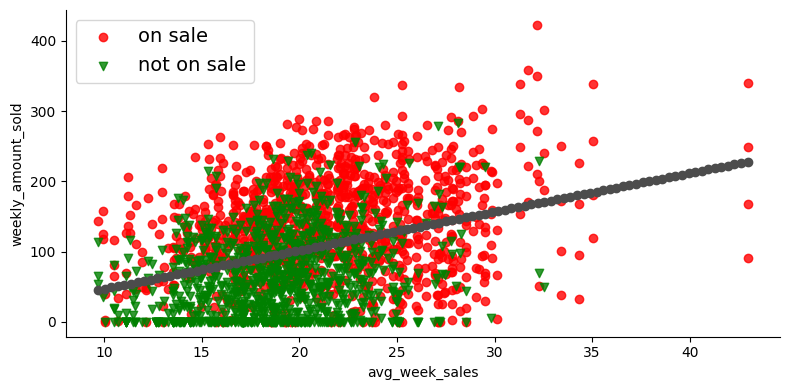

In [173]:
# A Visual Guide to Bias - Businesses that can afford a sale tend to have higher amount sold with/without sales
plt.rc('font', size=10)
fig = plt.figure()

sns.lmplot(data=data,                   # plot regression model
           ci=None,
           x='avg_week_sales',          # amount sold week of sales
           y='weekly_amount_sold',      # general weekly amount sold (before sales)
           scatter=False,
           height=4, aspect=2)

plt.scatter(x=data.query("is_on_sale==1")["avg_week_sales"],
            y = data.query("is_on_sale==1")["weekly_amount_sold"],
            label="on sale",
            color='r', alpha=0.8, marker=marker[0])

plt.scatter(x=data.query("is_on_sale==0")["avg_week_sales"],
            y = data.query("is_on_sale==0")["weekly_amount_sold"],
            label="not on sale",
            color='g', alpha=0.8, marker=marker[1])
plt.legend(fontsize="14")